# Exercício 1.3) k-medoídes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = np.array(list(range(1,8)))

matriz_distancias = np.array([[0.00, 0.21, 1.26, 1.18, 2.36, 2.09, 0.44],
                              [0.21, 0.00, 1.44, 1.39, 2.56, 2.28, 0.42],
                              [1.26, 1.44, 0.00, 0.64, 1.23, 0.89, 1.26],
                              [1.18, 1.39, 0.64, 0.00, 1.23, 1.05, 1.40],
                              [2.36, 2.56, 1.23, 1.23, 0.00, 0.39, 2.46],
                              [2.09, 2.28, 0.89, 1.05, 0.39, 0.00, 2.14],
                              [0.44, 0.42, 1.26, 1.40, 2.46, 2.14, 0.00]])

Neste caso só precisamos da matriz de distâncias, não dos valores dos atributos.

In [3]:
# X = np.array([[1.11, 1.05],
#               [0.94, 0.93],
#               [2.36, 1.22],
#               [2.04, 1.78],
#               [3.23, 2.09],
#               [3.08, 1.73],
#               [1.25, 0.63]])

# def distancia_euclidiana(x,y):
#     return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

# matriz_distancias = np.array([[distancia_euclidiana(x,y) for x in X] for y in X])

In [4]:
indice_medoides = [2,3]
print("indices dos medoides iniciais\n")
print(indice_medoides)

indices dos medoides iniciais

[2, 3]


In [5]:
for i in range(5):
    print("iteração "+str(i+1)+"\n")

    distancias_aos_medoides = {}
    for j, x in enumerate(X):
        distancias_aos_medoides[str(x)] = []
        for ind_med in indice_medoides:
            distancias_aos_medoides[str(x)].append(matriz_distancias[j,ind_med])

    matriz = pd.DataFrame(distancias_aos_medoides).T
    matriz['mais_prox'] = matriz.apply(np.argmin,axis=1)
    matriz = matriz.reset_index()
    print("matriz de distâncias dos exemplos até os medoídes\n")
    print(matriz)

    indice_medoides = []
    for grupo in [0,1]:
        lista_aux = list(matriz.query("mais_prox == @grupo").index)
        matriz_aux = matriz_distancias[([[item]*len(lista_aux) for item in lista_aux]), 
                                       len(lista_aux)*[lista_aux]]
        indice_medoides.append(lista_aux[np.argmin(np.sum(matriz_aux,axis=0))])
    print("\nindice dos medoides atualizados (indice que minimiza a soma das distâncias dos elementos daquele cluster até ele\n")
    print(indice_medoides)
    print("\n")

iteração 1

matriz de distâncias dos exemplos até os medoídes

  index     0     1  mais_prox
0     1  1.26  1.18          1
1     2  1.44  1.39          1
2     3  0.00  0.64          0
3     4  0.64  0.00          1
4     5  1.23  1.23          0
5     6  0.89  1.05          0
6     7  1.26  1.40          0

indice dos medoides atualizados (indice que minimiza a soma das distâncias dos elementos daquele cluster até ele

[2, 0]


iteração 2

matriz de distâncias dos exemplos até os medoídes

  index     0     1  mais_prox
0     1  1.26  0.00          1
1     2  1.44  0.21          1
2     3  0.00  1.26          0
3     4  0.64  1.18          0
4     5  1.23  2.36          0
5     6  0.89  2.09          0
6     7  1.26  0.44          1

indice dos medoides atualizados (indice que minimiza a soma das distâncias dos elementos daquele cluster até ele

[5, 1]


iteração 3

matriz de distâncias dos exemplos até os medoídes

  index     0     1  mais_prox
0     1  2.09  0.21          1
1    

O algoritmo converge (os centroídes param de ser atualizados a partir da iteração 3. Ficamos com os grupos:

Grupo 0 = {exemplos 3, 4, 5, 6}

Grupo 1 = {exemplos 1, 2, 7}

Visualmente:

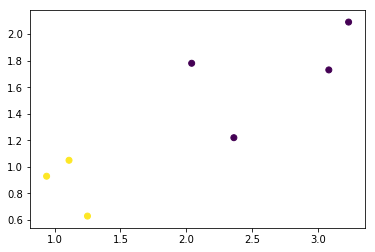

In [6]:
X = np.array([[1.11, 1.05],
              [0.94, 0.93],
              [2.36, 1.22],
              [2.04, 1.78],
              [3.23, 2.09],
              [3.08, 1.73],
              [1.25, 0.63]])

plt.scatter(X[:,0],X[:,1], c = matriz['mais_prox'])
plt.show()